# Air Quality

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load data
data = pd.read_excel('AirQualityUCI.xlsx')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
#checking duplicate values
print("Number of duplicate values: ", data.duplicated().sum())
print('\n')

#checking the data types of the columns
data.info()
print('\n')

#checking for null values
data.isnull().sum()
print('\n')

#dropping unnecessary features
data1 = data.drop(['Date','Time'], axis=1)

data1.head()
data1.describe()

Number of duplicate values:  0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64 

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [ ]:
#handling missing values
def handle_missing_value(df, column_name, replace_value):
  # Check if the column exists
  if column_name not in df.columns:
    raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
  # Calculation for replacing values
  filtered_data = df[df[column_name] != replace_value]
  column_mean = filtered_data[column_name].mean()
  df.loc[df[column_name] == replace_value, column_name] = column_mean
  return df

In [ ]:
#handling missing values of each column
df = handle_missing_value(data1, 'CO(GT)', -200)
df = handle_missing_value(data1, 'PT08.S1(CO)', -200)
df = handle_missing_value(data1, 'NMHC(GT)', -200)
df = handle_missing_value(data1, 'C6H6(GT)', -200)
df = handle_missing_value(data1, 'PT08.S2(NMHC)', -200)
df = handle_missing_value(data1, 'NOx(GT)', -200)
df = handle_missing_value(data1, 'PT08.S3(NOx)', -200)
df = handle_missing_value(data1, 'NO2(GT)', -200)
df = handle_missing_value(data1, 'PT08.S4(NO2)', -200)
df = handle_missing_value(data1, 'PT08.S5(O3)', -200)
df = handle_missing_value(data1, 'T', -200)
df = handle_missing_value(data1, 'RH', -200)
df = handle_missing_value(data1, 'AH', -200)
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.152750,1099.707856,218.811816,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,1.316068,212.796116,63.870229,7.302474,261.557856,193.419417,251.741784,43.911095,339.365351,390.609000,8.658396,16.974308,0.395836
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.200000,941.250000,218.811816,4.591495,742.500000,112.000000,665.500000,85.900000,1241.500000,741.750000,12.025000,36.550000,0.746115
50%,2.152750,1074.500000,218.811816,8.593367,923.250000,229.000000,817.500000,113.075515,1456.143486,982.500000,18.275000,49.232360,1.015441
75%,2.600000,1221.250000,218.811816,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


## Scaling

In [ ]:
def min_max_scaler(df, cols):
  df_copy = df.copy()
  for col in cols:
    min_val = df_copy[col].min()
    max_val = df_copy[col].max()
    df_copy[col] = (df_copy[col] - min_val) / (max_val - min_val)
  return df_copy

In [ ]:
# temp_df = df.drop(['T','RH','AH'], axis=1)
# columns_for_scaling = list(temp_df.columns)
# scaler = min_max_scaler(df, columns_for_scaling)
# scaler.head()

In [ ]:
scaler = min_max_scaler(df, df.columns)
scaler.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.211864,0.511849,0.120981,0.184498,0.361737,0.111036,0.311024,0.328694,0.513040,0.454654,0.333333,0.499057,0.280046
1,0.161017,0.463196,0.088832,0.145428,0.312167,0.068382,0.360796,0.266509,0.453125,0.326382,0.326882,0.484287,0.264279
2,0.177966,0.542011,0.068528,0.139148,0.303701,0.087339,0.346500,0.331655,0.451214,0.370588,0.296774,0.563168,0.276374
3,0.177966,0.522980,0.061760,0.142780,0.308617,0.115098,0.326168,0.355345,0.464366,0.426741,0.277419,0.638906,0.294198
4,0.127119,0.448833,0.037225,0.100156,0.247030,0.087339,0.374034,0.337578,0.422212,0.386228,0.280645,0.633564,0.295215


## Train Test Split

In [ ]:
#separating independent and dependent variables
X = scaler.drop(['T','RH','AH'], axis=1)
y = scaler["RH"]

X_train = X.iloc[:7017]
y_train = y.iloc[:7017]
X_test = X.iloc[7017:]
y_test = y.iloc[7017:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7017, 10)
(7017,)
(2340, 10)
(2340,)


## Linear Regression

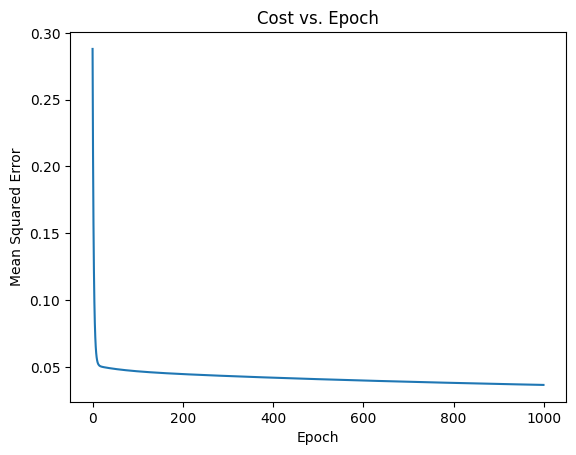

Mean Squared Error (Test MSE): 0.03578376556523658
Mean Squared Error (Train MSE): 0.0364685657356675


In [ ]:
def initialize_parameters(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

def compute_predictions(X, weights, bias):
    return np.dot(X, weights) + bias

def compute_gradients(X, y, y_pred):
    n_samples = X.shape[0]
    dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
    db = (1/n_samples) * np.sum(y_pred - y)
    return dw, db

def update_parameters(weights, bias, dw, db, learning_rate):
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

def train(X, y, learning_rate, epoch):
    n_samples, n_features = X.shape
    weights, bias = initialize_parameters(n_features)
    costs = []  # Store MSE values at each epoch

    for i in range(epoch):
        y_pred = compute_predictions(X, weights, bias)
        dw, db = compute_gradients(X, y, y_pred)
        weights, bias = update_parameters(weights, bias, dw, db, learning_rate)

        # Calculate MSE and append to costs
        cost = MSE(y, y_pred)
        costs.append(cost)

    return weights, bias, costs

def predict(X, weights, bias):
    return np.dot(X, weights) + bias

def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


# Train the model
weights, bias, costs = train(X_train, y_train, learning_rate=0.5, epoch=1000)

# Plot
plt.plot(range(len(costs)), costs)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs. Epoch')
plt.show()

# Make predictions (using Test Set)
y_pred_test = predict(X_test, weights, bias)
# Calculate Mean Squared Error
test_mse = MSE(y_test, y_pred_test)
print("Mean Squared Error (Test MSE):", test_mse)

# Make predictions (using Train Set)
y_pred_train = predict(X_train, weights, bias)
# Calculate Mean Squared Error
train_mse = MSE(y_train, y_pred_train)
print("Mean Squared Error (Train MSE):", train_mse)

In [ ]:
# Implementation of Linear regression using Scikit-learn for cross checking my manual Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Initialize Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions (using Train Set)
y_pred_train = model.predict(X_train)
# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (Train MSE):", train_mse)

# Make predictions (using Test Set)
y_pred_test = model.predict(X_test)
# Calculate Mean Squared Error
test_mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Test MSE):", test_mse)

Mean Squared Error (Train MSE): 0.025285436088962273
Mean Squared Error (Test MSE): 0.028915335893607997
